<a href="https://colab.research.google.com/github/LeNovice/Assignments_WILP_SEM3/blob/main/Final_DL_Assignment1_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning Assignment 1 Question 1 notebook:

###Contributers:

* HIMANSHU SINGHAL:    2020sc04154    |    100%

* WADIKAR PINAK SUHAS: 2020sc04158    |    100%

In [ ]:
import tensorflow as tf

# For DNN model
from tensorflow.keras import models
from tensorflow.keras import layers

# For changing shapes of np array tensors
import numpy as np

# For plotting the dataset
import matplotlib.pyplot as plt

# For Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# For confusion matrix and classification report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

In [ ]:
(x_train_orig, y_train_orig), (x_test_orig, y_test_orig) = tf.keras.datasets.cifar10.load_data()

assert x_train_orig.shape == (50000, 32, 32, 3)
assert x_test_orig.shape == (10000, 32, 32, 3)
assert y_train_orig.shape == (50000, 1)
assert y_test_orig.shape == (10000, 1)

###1. Data Visualization and augmentation (1 mark)

*   Plot at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).

In [ ]:
USE_AUG_DATA = False
# Get the class IDs of each data element in a set
classes_ID = np.unique(y_train_orig)
display(classes_ID)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
data_class_acc_class = []
for class_id in classes_ID:
    data_class_acc_class.append([i for i,x in enumerate(y_train_orig) if x == class_id])

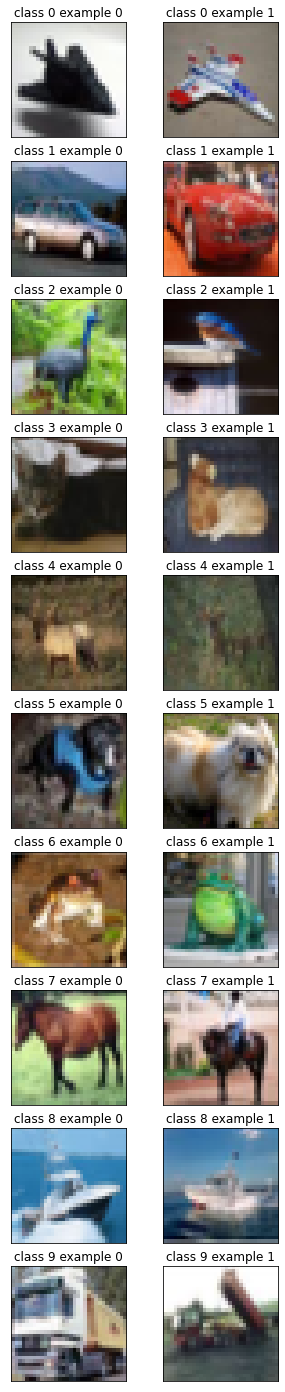

In [ ]:
rows = len(classes_ID)
columns = 2         # Because 2 of each is asked

fig = plt.figure(figsize=(5,25))
i_ax=0
for class_id in classes_ID:
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(x_train_orig[data_class_acc_class[class_id][0]])
    plt.xticks([])      #Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " example 0")
    i_ax = i_ax+1
    
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(x_train_orig[data_class_acc_class[class_id][1]])
    plt.title("class " + str(class_id) + " example 1")
    plt.xticks([])  
    plt.yticks([])
    i_ax = i_ax+1
plt.show()

*   Apply rotation and height shift augmentation (rotation_range, height_shift_range)to the dataset separately. Print the augmented image and the original image for each class and each augmentation.



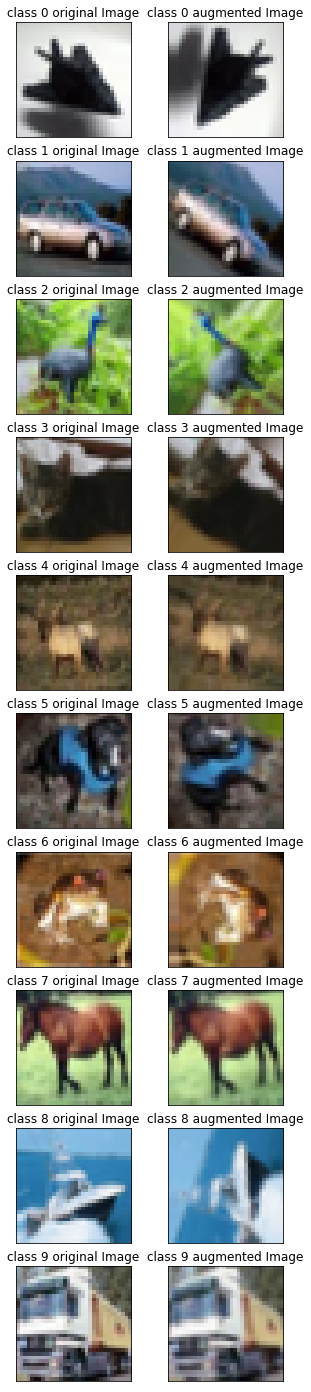

In [ ]:
# Batch size of Datagenerator iterator:
Batch_Size = 128
# Number of Epochs
num_epoch = 80

# First applying random rotation to the dataset:
# define Data preparation
datagen_rotate = ImageDataGenerator(rotation_range=90)

# Fit and find the generation parameters over x_train
datagen_rotate.fit(x_train_orig)

"""
For the data visualisation question,
We will go for single image augmentation to maintain one to one display. This is just for the feature that the assignment question demands and will have no effect on the rest of the model
"""
fig = plt.figure(figsize=(5,25))
i_ax=0
for class_id in classes_ID:
    original_image = x_train_orig[data_class_acc_class[class_id][0]]
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(original_image)
    plt.xticks([])      # Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " original Image")
    i_ax = i_ax + 1
    # input image to flow API should have (samples, width, height, channels) structure
    # original_image is an ndarray. We need to add the sample dimension to it
    
    original_image_input = original_image.reshape((1, *original_image.shape))
    augmented_image = datagen_rotate.flow(original_image_input)
    fig.add_subplot(rows, columns, i_ax+1)
    # augmented_image[0] will have the x_train image. This will be in float (after Affine Warp calculations) and in range [0,1]. We need to bring it back to [0,255] (by multiplying it by 255)
    np.multiply(augmented_image[0],255)
    augmented_image_disp = augmented_image[0].astype(int)
    plt.imshow(augmented_image_disp.reshape(original_image.shape))
    plt.xticks([])      # Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " augmented Image")
    i_ax = i_ax + 1
plt.show()

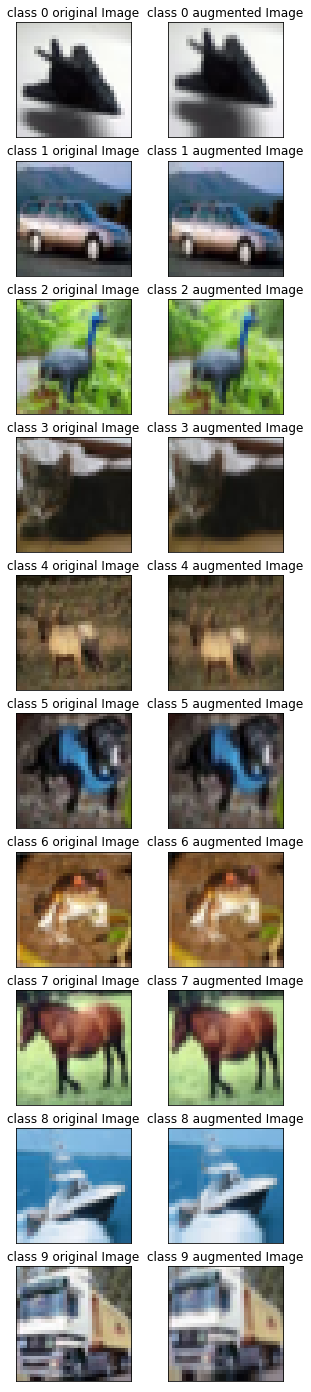

In [ ]:
# Height shift range is selected just so that important image featires in the CIFAR10 data set are not cropped
datagen_height = ImageDataGenerator(height_shift_range=2.5)
datagen_height.fit(x_train_orig)

fig = plt.figure(figsize=(5,25))
i_ax=0
for class_id in classes_ID:
    original_image = x_train_orig[data_class_acc_class[class_id][0]]
    fig.add_subplot(rows, columns, i_ax+1)
    plt.imshow(original_image)
    plt.xticks([])      # Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " original Image")
    i_ax = i_ax + 1
    # input image to flow API should have (samples, width, height, channels) structure
    # original_image is an ndarray. We need to add the sample dimension to it
    
    original_image_input = original_image.reshape((1, *original_image.shape))
    augmented_image = datagen_height.flow(original_image_input)
    fig.add_subplot(rows, columns, i_ax+1)

    # augmented_image[0] will have the x_train image. This will be in float (after Affine Warp calculations) and in range [0,1]. We need to bring it back to [0,255] (by multiplying it by 255)
    np.multiply(augmented_image[0],255)
    augmented_image_disp = augmented_image[0].astype(int)
    plt.imshow(augmented_image_disp.reshape(original_image.shape))
    plt.xticks([])      # Does not clutter the axes
    plt.yticks([])
    plt.title("class " + str(class_id) + " augmented Image")
    i_ax = i_ax + 1
plt.show()

#Generate the iterator
data_flow_height = datagen_height.flow(x_train_orig, y_train_orig, batch_size=Batch_Size)

*   Bring the train and test data in the required format.

We tried to convert the data into grayscale but we did not notie any change in accuracy. Following is the code for Grayscale.

Eventually we decided to comment it out because it is not giving any change in accuracy. We commented it out because we did not want to lose out on any features present in the RGB dataset.

In [ ]:
"""import cv2
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
rgb = x_test[2]
display(rgb.shape)
fig = plt.subplot()
plt.imshow(rgb)"""

'import cv2\nx_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])\nx_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])\nrgb = x_test[2]\ndisplay(rgb.shape)\nfig = plt.subplot()\nplt.imshow(rgb)'

In [ ]:
# Flatten the input images as input to the DNN model is 1D array of the image pixels.
# If you are working on Augmented Data then x_train's matrix should have rank 4. We need not reshape then.
x_train = x_train_orig.reshape((50000, 32*32*3))
x_test = x_test_orig.reshape((10000, 32*32*3))

x_train_orig = x_train_orig.astype('float32')/255     #We convert each pixel from 0-255 int to 0-1 float
x_test_orig = x_test_orig.astype('float32')/255       #We convert each pixel from 0-255 int to 0-1 float

#If necessary, bring the data into float32 type:
x_train = x_train.astype('float32')/255     #We convert each pixel from 0-255 int to 0-1 float
x_test = x_test.astype('float32')/255       #We convert each pixel from 0-255 int to 0-1 float

# Create one-hot encoding for output labels
# This is done because the output of the layers will NOT be integer. Rather it will be 10 nodes each representing a class of CIFAR10 dataset.
y_train = tf.keras.utils.to_categorical(y_train_orig)
y_test = tf.keras.utils.to_categorical(y_test_orig)

y_train_orig = tf.keras.utils.to_categorical(y_train_orig)
y_test_orig = tf.keras.utils.to_categorical(y_test_orig)


*   Print the shapes of train and test data.

In [ ]:
display("Shape of training images")
display(x_train.shape)
display("Shape of test images")
display(x_test.shape)
display("Shape of training labels")
display(y_train.shape)
display("Shape of test images")
display(y_test.shape)

'Shape of training images'

(50000, 3072)

'Shape of test images'

(10000, 3072)

'Shape of training labels'

(50000, 10)

'Shape of test images'

(10000, 10)

In [ ]:
#Missclassification display function
from sklearn import preprocessing


def missclassify_display(y_test_orig, y_pred):
    le = preprocessing.LabelEncoder()
    display(classes_ID)
    le.fit(classes_ID)

    fig = plt.figure(figsize=(10,25))
    i_ax=0
    for i in classes_ID:
        count=2
        j=0
        while count>0:
            y_test_label = np.argmax(le.inverse_transform(y_test_orig[j].astype(int)))
            y_pred_label = np.argmax(le.inverse_transform(y_pred[j].astype(int)))
            if (y_test_label != y_pred_label) and (y_test_label==i):
                fig.add_subplot(rows, columns, i_ax+1)
                count=count-1
                plt.imshow(x_test_orig[j])
                plt.xticks([])
                plt.yticks([])
                plt.title("class " + str(i) + " wrongly classified image")
                i_ax = i_ax + 1
            j=j+1
    plt.show()

### 2.  Model Building 
* Sequential Model layers- Use AT LEAST 3 hidden layers with appropriate input for each. Choose the best number for hidden units and give reasons.
* Add L2 regularization to all the layers.
* Add one layer of dropout at the appropriate position and give reasons.
* Choose the appropriate activation function for all the layers.
* Print the model summary.

In [ ]:
#HyperParameterList
dnnModel = models.Sequential()
Regularization_constant_lambda = 0.005       # Putting this to 0 will remove L2 regularization?

#Adding the layers to the sequential DNN Model

# Layer 1 = Input Layer
#We are applying regularization to layer's kernel (Dense) and layer's output only. Not applying to bias
dnnModel.add(layers.Dense(512, activation='relu', input_shape= (32*32*3,), kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel.add(layers.BatchNormalization())

# Layer 2 = Hidden Layer 1
dnnModel.add(layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel.add(layers.BatchNormalization())

# Layer 3 = Hidden Layer 2
dnnModel.add(layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel.add(layers.BatchNormalization())

# Layer 4 = Hidden Layer 3
dnnModel.add(layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel.add(layers.BatchNormalization())

"""Dropouts act like bagging algorithms wehre we drop few features/ data instances and traing different models based on the dropped instances.
We select this layer as it has the minimum number of nodes. Dropping upto 50% should not affect the overall DNN Model severely"""
dnnModel.add(layers.Dropout(0.5))

# Layer 5 = Output Layer
dnnModel.add(layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

dnnModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_8 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_9 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_10 (Bat  (None, 128)             

### 3. Model Compilation (0.25 mark)
* Compile the model with the appropriate loss function.
* Use an appropriate optimizer. Give reasons for the choice of learning rate and its value.
* Use accuracy as a metric.

Selection of Learning rate:
Ideally Learning rate should be smaller than twice the minimum optimal learning rate where minimal optimal learning rate is given by:

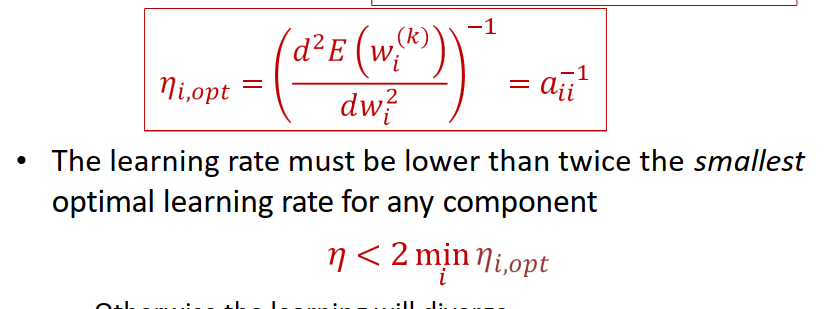

In CIFAR10 dataset case, the error function will be the categorical cross entropy (multi-class classification problem)

However, it is easier to get better learning rate by using trial and error.
We select the learning rate for which the accuracy for training data as well as test data matches and is high.

In [ ]:
# Loss will be Cross-entropy since this is a multi-label classification problem
# We check whether global minimum is possible using the ADAM optimizer but SGD optimizer should also work
# Hyperparameters
Learning_Rate = 0.001                       #https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

opt = tf.keras.optimizers.SGD(learning_rate=Learning_Rate, momentum=0.5)
dnnModel.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'] )

### 4. Model Training (0.5 + 0.25 = 0.75 mark)
* Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
* Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

In [ ]:
# Precursor to measure training time
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_train_begin(self, epoch, logs={}):
        """We over-ride callback methods declared here: https://keras.io/guides/writing_your_own_callbacks/"""
        self.starttime = timer()
    def on_train_end(self, epoch, logs={}):
        self.totaltime = timer()-self.starttime

timingCB = TimingCallback()

In [ ]:
h = dnnModel.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=80, batch_size=128, callbacks=[timingCB])
#x = np.concatenate((x_train, x_test), axis=0)
#y = np.concatenate((y_train, y_test), axis=0)
#print(x.shape, y.shape)
#h = dnnModel.fit(x, y, validation_split=0.16, epochs=80, batch_size=128, callbacks=[timingCB])

Epoch 1/80
391/391 [==============================] - 5s 9ms/step - loss: 11.3145 - accuracy: 0.2084 - val_loss: 10.1015 - val_accuracy: 0.2732
Epoch 2/80
391/391 [==============================] - 3s 8ms/step - loss: 10.5064 - accuracy: 0.2622 - val_loss: 10.2467 - val_accuracy: 0.3046
Epoch 3/80
391/391 [==============================] - 3s 8ms/step - loss: 10.1040 - accuracy: 0.2799 - val_loss: 9.9336 - val_accuracy: 0.3219
Epoch 4/80
391/391 [==============================] - 3s 8ms/step - loss: 9.7763 - accuracy: 0.2967 - val_loss: 9.8467 - val_accuracy: 0.2952
Epoch 5/80
391/391 [==============================] - 3s 8ms/step - loss: 9.4847 - accuracy: 0.3192 - val_loss: 9.3847 - val_accuracy: 0.3490
Epoch 6/80
391/391 [==============================] - 3s 8ms/step - loss: 9.2429 - accuracy: 0.3324 - val_loss: 9.1842 - val_accuracy: 0.3607
Epoch 7/80
391/391 [==============================] - 3s 8ms/step - loss: 9.0385 - accuracy: 0.3419 - val_loss: 8.9069 - val_accuracy: 0.3851
E

In [ ]:
print('Final training loss \t', h.history['loss'][-1])
print('Final training accuracy \t', h.history['accuracy'][-1])
print("Total training time = " + str(timingCB.totaltime))

Final training loss 	 3.3582828044891357
Final training accuracy 	 0.5831599831581116
Total training time = 248.8397562629998


### 5. Model Training (0.5 + 0.25 = 0.75 mark)
* Train the model for an appropriate number of epochs. Print the train and validation accuracy and loss for each epoch. Use the appropriate batch size.
* Plot the loss and accuracy history graphs for both train and validation set. Print the total time taken for training.

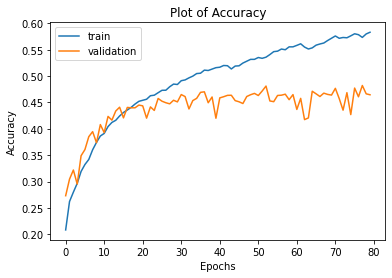

In [ ]:
# Plot the training  accuracy  
plt.plot(h.history['accuracy'], label='train')
plt.plot(h.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

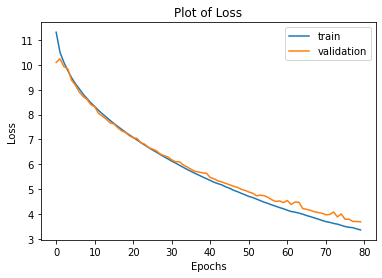

In [ ]:
# Plot the traininig loss 
plt.plot(h.history['loss'], label='train')
plt.plot(h.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

### 6. Model Evaluation (0.5 + 0.5 = 1 mark)
* Print the final train and validation loss and accuracy. Print confusion matrix and classification report for the validation dataset. Analyse and report the best and worst performing class.
* Print the two most incorrectly classified images for each class in the test dataset.

In [ ]:
testLoss, testAccuracy = dnnModel.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 3.6860 - accuracy: 0.4646


In [ ]:
print('Testing loss \t', testLoss)
print('Testing accuracy \t', testAccuracy)

Testing loss 	 3.6859514713287354
Testing accuracy 	 0.46459999680519104


In [ ]:
# Print Confusion Matrix
predictions = dnnModel.predict(x_test)
y_pred = (predictions > 0.5)
print('Confusion Matrix')
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print Classification Report
print('Classification Report')
print(classification_report(y_test_orig, y_pred, target_names=target_names))

Confusion Matrix


array([[858,   4,  13,  10,   1,   2,  10,  11,  74,  17],
       [480, 313,   2,  15,   1,   1,   7,   7,  56, 118],
       [642,   6, 160,  37,  15,  23,  77,  27,   7,   6],
       [634,   4,  17, 183,   2,  62,  67,  14,   7,  10],
       [673,   1,  59,  21, 116,   8,  73,  37,  10,   2],
       [603,   1,   9, 127,  10, 176,  39,  26,   6,   3],
       [436,   2,  15,  41,  12,   4, 483,   3,   2,   2],
       [514,   2,  10,  22,  17,  19,   9, 381,   4,  22],
       [450,  16,   2,  22,   1,   4,   5,   4, 461,  35],
       [474,  48,   1,   9,   2,   4,  20,  20,  55, 367]])

Classification Report
              precision    recall  f1-score   support

    airplane       0.66      0.44      0.53      1000
  automobile       0.79      0.31      0.45      1000
        bird       0.56      0.16      0.25      1000
         cat       0.38      0.18      0.25      1000
        deer       0.66      0.12      0.20      1000
         dog       0.58      0.18      0.27      1000
        frog       0.61      0.48      0.54      1000
       horse       0.72      0.38      0.50      1000
        ship       0.68      0.46      0.55      1000
       truck       0.63      0.37      0.46      1000

   micro avg       0.63      0.31      0.41     10000
   macro avg       0.62      0.31      0.40     10000
weighted avg       0.62      0.31      0.40     10000
 samples avg       0.31      0.31      0.31     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Based on the f1-score above we can say thet 'dog' is the worst performing class while 'automobile' is the best performing class.

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

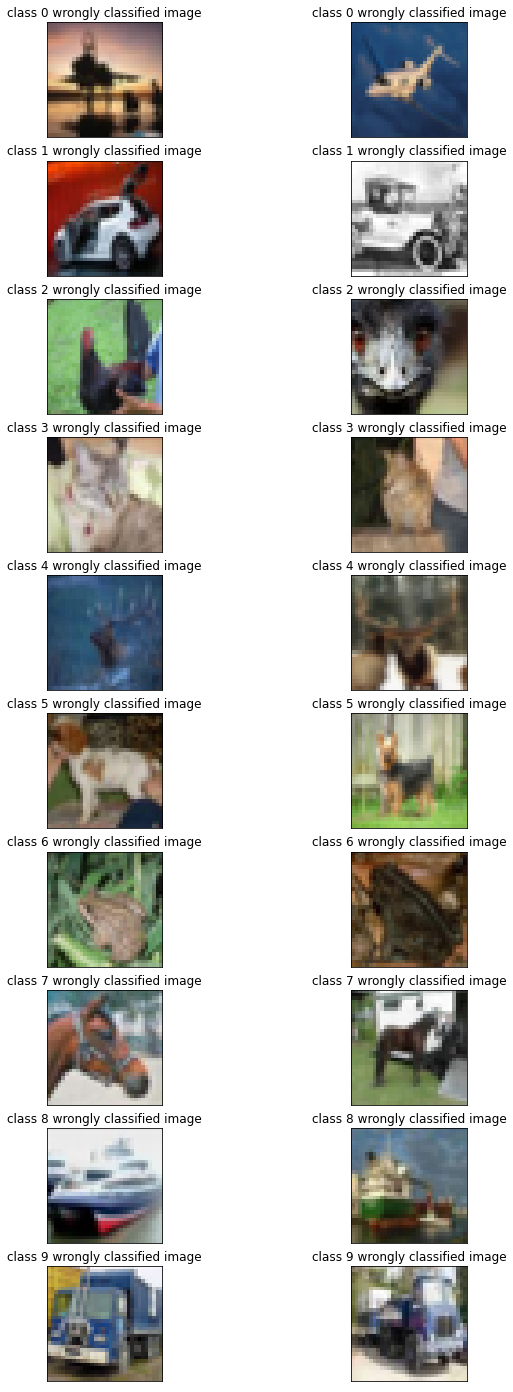

In [ ]:
missclassify_display(y_test_orig, y_pred)

###7. Hyperparameter Tuning- 
Build two more additional models by changing the following hyperparameters ONE at a time. Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model. (1 + 1 = 2 marks)

	

*   Optimiser: Use a different optimizer with the appropriate LR value.
*   Network Depth: Change the number of hidden layers and hidden units for each layer.

Write a comparison between each model and give reasons for the difference in results.

	

##Optimiser: Use a different optimizer with the appropriate LR value.

In [ ]:
# Optimiser: Use a different optimizer with the appropriate LR value.
model1 = models.Sequential()
Regularization_constant_lambda = 0.0001
initializer = tf.keras.initializers.HeNormal()
# Adding the layers to the sequential DNN Model

# Layer 1 = Input Layer
# We are applying regularization to layer's kernel (Dense) and layer's output only. Not applying to bias
model1.add(layers.Dense(512, activation='relu', input_shape= (32*32*3,), kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model1.add(layers.BatchNormalization())

# Layer 2 = Hidden Layer 1
model1.add(layers.Dense(256, activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model1.add(layers.BatchNormalization())

# Layer 3 = Hidden Layer 2
model1.add(layers.Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model1.add(layers.BatchNormalization())

# Layer 4 = Hidden Layer 3
model1.add(layers.Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model1.add(layers.BatchNormalization())

"""Dropouts act like bagging algorithms wehre we drop few features/ data instances and traing different models based on the dropped instances.
We select this layer as it has the minimum number of nodes. Dropping upto 50% should not affect the overall DNN Model severely"""
model1.add(layers.Dropout(0.5))

# Layer 5 = Output Layer
model1.add(layers.Dense(10, activation='softmax', kernel_initializer=initializer, kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

display(model1.summary())

Learning_Rate = 0.001 

opt = tf.keras.optimizers.Adam(learning_rate=Learning_Rate)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )

#x = np.concatenate((x_train, x_test), axis=0)
#y = np.concatenate((y_train, y_test), axis=0)

h1 = model1.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, callbacks=[timingCB])
#h1 = model1.fit(x, y, validation_split=0.16, epochs=80, batch_size=128, callbacks=[timingCB])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_16 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_17 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_18 (Bat  (None, 128)             

None

Epoch 1/50
391/391 [==============================] - 5s 9ms/step - loss: 2.4449 - accuracy: 0.3006 - val_loss: 2.9498 - val_accuracy: 0.1741
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 1.9771 - accuracy: 0.3843 - val_loss: 1.9784 - val_accuracy: 0.3699
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 1.8557 - accuracy: 0.4170 - val_loss: 1.8588 - val_accuracy: 0.4113
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 1.7634 - accuracy: 0.4451 - val_loss: 1.7803 - val_accuracy: 0.4257
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 1.7128 - accuracy: 0.4573 - val_loss: 1.8693 - val_accuracy: 0.4021
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6581 - accuracy: 0.4726 - val_loss: 1.7357 - val_accuracy: 0.4465
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 1.6100 - accuracy: 0.4851 - val_loss: 1.7202 - val_accuracy: 0.4385
Epoch 

###Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model.

In [ ]:
print('Final training loss for model 1 \t', h1.history['loss'][-1])
print('Final training accuracy for model 1 \t', h1.history['accuracy'][-1])
print("Total training time for model 1 = " + str(timingCB.totaltime))

Final training loss for model 1 	 1.1949442625045776
Final training accuracy for model 1 	 0.6269800066947937
Total training time for model 1 = 158.88112353299994


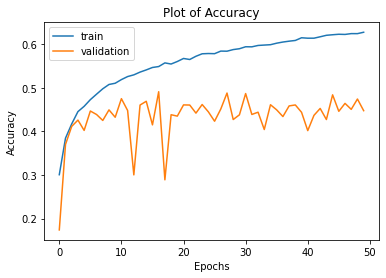

In [ ]:
# Plot the training accuracy for model 1
plt.plot(h1.history['accuracy'], label='train')
plt.plot(h1.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

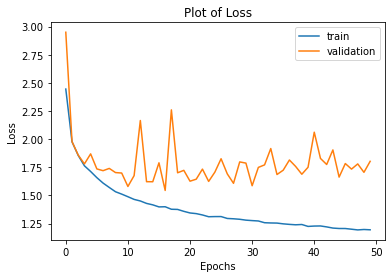

In [ ]:
# Plot the traininig loss for model 1
plt.plot(h1.history['loss'], label='train')
plt.plot(h1.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [ ]:
testLoss_model1, testAccuracy_model1 = model1.evaluate(x_test, y_test)
print('Testing loss for model 1\t', testLoss_model1)
print('Testing accuracy for model 1\t', testAccuracy_model1)

313/313 [==============================] - 1s 4ms/step - loss: 1.8033 - accuracy: 0.4473
Testing loss for model 1	 1.8032972812652588
Testing accuracy for model 1	 0.447299987077713


In [ ]:
# Print Confusion Matrix
predictions = model1.predict(x_test)
y_pred = (predictions > 0.5)
print('Confusion Matrix')
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print Classification Report
print('Classification Report')
print(classification_report(y_test_orig, y_pred, target_names=target_names))

Confusion Matrix


array([[582,  53,   3,   2,   8,   1,  15,  20, 243,  73],
       [211, 557,   1,   3,   3,   2,   8,  10,  55, 150],
       [546,  27,  75,  18,  91,  16,  84,  73,  35,  35],
       [631,  32,   7,  92,  15,  47,  56,  30,  27,  63],
       [472,  17,  14,   8, 247,   6, 105,  73,  29,  29],
       [578,  24,   2,  57,  21, 160,  36,  51,  37,  34],
       [404,  31,   6,  18,  38,   7, 443,  13,   9,  31],
       [372,  39,   3,   9,  24,  18,  20, 423,  16,  76],
       [216,  57,   1,   3,   9,   4,   3,   4, 618,  85],
       [205, 171,   1,   5,   4,   1,   4,  13,  55, 541]])

Classification Report
              precision    recall  f1-score   support

    airplane       0.67      0.24      0.36      1000
  automobile       0.55      0.56      0.55      1000
        bird       0.66      0.07      0.13      1000
         cat       0.43      0.09      0.15      1000
        deer       0.54      0.25      0.34      1000
         dog       0.61      0.16      0.25      1000
        frog       0.57      0.44      0.50      1000
       horse       0.60      0.42      0.49      1000
        ship       0.55      0.62      0.58      1000
       truck       0.48      0.54      0.51      1000

   micro avg       0.55      0.34      0.42     10000
   macro avg       0.57      0.34      0.39     10000
weighted avg       0.57      0.34      0.39     10000
 samples avg       0.34      0.34      0.34     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

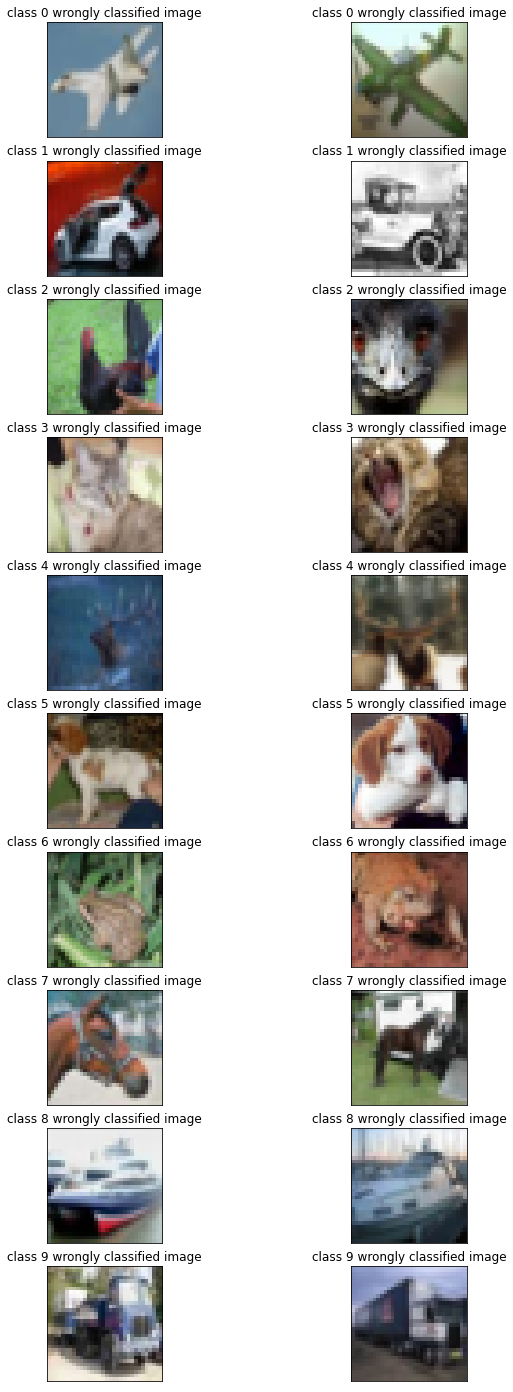

In [ ]:
missclassify_display(y_test_orig, y_pred)

With the Adam OPtimizer, from the accuracy reports, we see that the model quickly converges to the minima as compared to SGD. This is becuase it takes 'exponentially weighted average' of the gradients to converge

The later half of the algorithm oscillates due to the high learning rate

##Network Depth: Change the number of hidden layers and hidden units for each layer.

In [ ]:
# Network Depth: Change the number of hidden layers and hidden units for each layer.
model2 = models.Sequential()
Regularization_constant_lambda = 0.005

# Adding the layers to the sequential DNN Model

# Layer 1 = Input Layer
# We are applying regularization to layer's kernel (Dense) and layer's output only. Not applying to bias
model2.add(layers.Dense(1536, activation='relu', input_shape= (32*32*3,), kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model2.add(layers.BatchNormalization())

# Layer 2 = Hidden Layer 1
model2.add(layers.Dense(768, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model2.add(layers.BatchNormalization())

# Layer 3 = Hidden Layer 2
model2.add(layers.Dense(384, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
model2.add(layers.BatchNormalization())

"""Dropouts act like bagging algorithms wehre we drop few features/ data instances and traing different models based on the dropped instances.
We select this layer as it has the minimum number of nodes. Dropping upto 50% should not affect the overall DNN Model severely"""
model2.add(layers.Dropout(0.5))

# Layer 4 = Output Layer
model2.add(layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
display(model2.summary())
Learning_Rate = 0.001 

opt = tf.keras.optimizers.SGD(learning_rate=Learning_Rate, momentum=0.5)
model2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'] )



#x = np.concatenate((x_train, x_test), axis=0)
#y = np.concatenate((y_train, y_test), axis=0)

#h2 = model2.fit(x, y, validation_split=0.16, epochs=80, batch_size=128, callbacks=[timingCB])
h2 = model2.fit( x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128, callbacks=[timingCB])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 1536)              4720128   
                                                                 
 batch_normalization_20 (Bat  (None, 1536)             6144      
 chNormalization)                                                
                                                                 
 dense_26 (Dense)            (None, 768)               1180416   
                                                                 
 batch_normalization_21 (Bat  (None, 768)              3072      
 chNormalization)                                                
                                                                 
 dense_27 (Dense)            (None, 384)               295296    
                                                                 
 batch_normalization_22 (Bat  (None, 384)             

None

Epoch 1/50
391/391 [==============================] - 4s 9ms/step - loss: 23.0428 - accuracy: 0.2614 - val_loss: 20.9242 - val_accuracy: 0.3211
Epoch 2/50
391/391 [==============================] - 3s 8ms/step - loss: 21.4775 - accuracy: 0.3154 - val_loss: 21.1809 - val_accuracy: 0.3371
Epoch 3/50
391/391 [==============================] - 3s 8ms/step - loss: 20.6676 - accuracy: 0.3351 - val_loss: 20.4749 - val_accuracy: 0.3687
Epoch 4/50
391/391 [==============================] - 3s 8ms/step - loss: 20.0358 - accuracy: 0.3536 - val_loss: 19.9514 - val_accuracy: 0.3769
Epoch 5/50
391/391 [==============================] - 3s 8ms/step - loss: 19.4873 - accuracy: 0.3678 - val_loss: 19.4326 - val_accuracy: 0.3921
Epoch 6/50
391/391 [==============================] - 3s 8ms/step - loss: 19.0102 - accuracy: 0.3883 - val_loss: 18.7768 - val_accuracy: 0.4160
Epoch 7/50
391/391 [==============================] - 3s 8ms/step - loss: 18.5671 - accuracy: 0.4030 - val_loss: 18.3929 - val_accuracy:

###Write the code for Model Building, Model Compilation, Model Training and Model Evaluation as given in the instructions above for each additional model.

In [ ]:
print('Final training loss for model 2 \t', h2.history['loss'][-1])
print('Final training accuracy for model 2 \t', h2.history['accuracy'][-1])
print("Total training time for model 2 = " + str(timingCB.totaltime))

Final training loss for model 2 	 9.312800407409668
Final training accuracy for model 2 	 0.639959990978241
Total training time for model 2 = 158.12146428899996


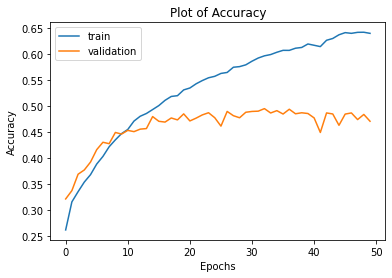

In [ ]:
# Plot the training accuracy for model 2
plt.plot(h2.history['accuracy'], label='train')
plt.plot(h2.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

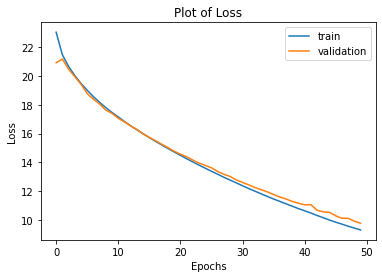

In [ ]:
# Plot the traininig loss for model 2
plt.plot(h2.history['loss'], label='train')
plt.plot(h2.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [ ]:
testLoss_model2, testAccuracy_model2 = model2.evaluate(x_test, y_test)
print('Testing loss for model 2\t', testLoss_model2)
print('Testing accuracy for model 2\t', testAccuracy_model2)

313/313 [==============================] - 1s 3ms/step - loss: 9.7766 - accuracy: 0.4707
Testing loss for model 2	 9.776632308959961
Testing accuracy for model 2	 0.4706999957561493


In [ ]:
# Print Confusion Matrix
predictions = model2.predict(x_test)
y_pred = (predictions > 0.5)
print('Confusion Matrix')
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print Classification Report
print('Classification Report')
print(classification_report(y_test_orig, y_pred, target_names=target_names))

Confusion Matrix


array([[831,  16,  14,   5,  20,  10,   3,  24,  70,   7],
       [392, 502,   1,   1,   8,   7,   1,  14,  38,  36],
       [591,   7, 140,  14, 124,  46,  19,  49,   5,   5],
       [638,   7,  10, 134,  36, 103,  17,  32,  17,   6],
       [495,   4,  18,   6, 355,  19,  29,  63,  11,   0],
       [503,   2,  13,  62,  41, 278,  14,  64,  21,   2],
       [552,   7,  10,  29, 106,  25, 248,  17,   4,   2],
       [407,   8,  10,   9,  37,  37,   2, 478,   5,   7],
       [450,  35,   1,   5,  14,   6,   1,   4, 477,   7],
       [507, 137,   2,   9,   4,   9,   5,  25,  40, 262]])

Classification Report
              precision    recall  f1-score   support

    airplane       0.60      0.46      0.52      1000
  automobile       0.69      0.50      0.58      1000
        bird       0.64      0.14      0.23      1000
         cat       0.49      0.13      0.21      1000
        deer       0.48      0.35      0.41      1000
         dog       0.51      0.28      0.36      1000
        frog       0.73      0.25      0.37      1000
       horse       0.62      0.48      0.54      1000
        ship       0.69      0.48      0.57      1000
       truck       0.78      0.26      0.39      1000

   micro avg       0.62      0.33      0.43     10000
   macro avg       0.62      0.33      0.42     10000
weighted avg       0.62      0.33      0.42     10000
 samples avg       0.33      0.33      0.33     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

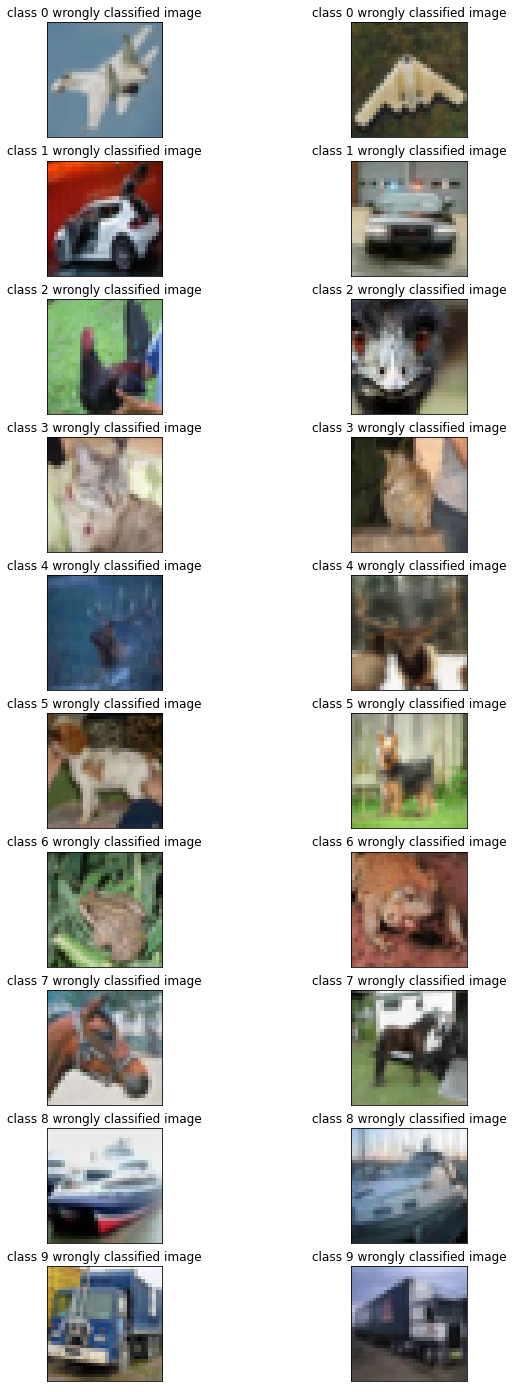

In [ ]:
missclassify_display(y_test_orig, y_pred)

In above experiment we increased the number of hyperparaeters by significant values.
We noticed that the training on the bigger model was slower compared to the other models which had lesser parameters.

The convergence is also slower as compared to ADAM optimizer.

We see however that precision values are uniform for all the classes

##Model Creation with Data Augmentation (Image Rotation)

In [ ]:
# define Data preparation
datagen_rotate = ImageDataGenerator(rotation_range=90)

# test data set
# Fit and find the generation parameters over x_train. NOTE: Since, we have changed the type of x_train (to float32), we need to re-fit onto x_train
datagen_rotate.fit(x_train_orig)

# Generate the iterator
data_flow_rotate = datagen_rotate.flow(x_train_orig, y_train_orig, batch_size=Batch_Size)

# Creating a sequential model
dnnModel_aug = models.Sequential()

# HyperParameterList
InputLayer_nodes = 512
HiddenLayer1_nodes = 256
HiddenLayer2_nodes = 128
HiddenLayer3_nodes = 64
OutputLayer_nodes = 10                      #This will not change because the output is a one hot vector of 10 elements
Regularization_constant_lambda = 0.001

# Adding the layers to the sequential DNN Model

# Layer 1 = Input Layer
# We are applying regularization to layer's kernel (Dense) and layer's output only. Not applying to bias
# For Augmented data, flatten the input layers to 32*32*3
dnnModel_aug.add(layers.Flatten(input_shape=(x_train_orig.shape[1], x_train_orig.shape[2], x_train_orig.shape[3])))
dnnModel_aug.add(layers.Dense(InputLayer_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug.add(layers.BatchNormalization())

# Layer 2 = Hidden Layer 1
dnnModel_aug.add(layers.Dense(HiddenLayer1_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug.add(layers.BatchNormalization())

"""Dropouts act like bagging algorithms wehre we drop few features/ data instances and traing different models based on the dropped instances.
We select this layer as it has the maximum number of nodes. Dropping upto 50% should not affect the overall DNN Model severely"""
dnnModel_aug.add(layers.Dropout(0.5))

# Layer 3 = Hidden Layer 2
dnnModel_aug.add(layers.Dense(HiddenLayer2_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug.add(layers.BatchNormalization())
#dnnModel.add(layers.Dropout(0.5))

# Layer 4 = Hidden Layer 3
dnnModel_aug.add(layers.Dense(HiddenLayer3_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug.add(layers.BatchNormalization())

# Layer 5 = Output Layer
dnnModel_aug.add(layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

dnnModel_aug.summary()

decay = Learning_Rate/num_epoch
opt = tf.keras.optimizers.SGD(lr=Learning_Rate, momentum=0.9, decay=decay, nesterov=False)
dnnModel_aug.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

h3 = dnnModel_aug.fit(data_flow_rotate, steps_per_epoch = x_train_orig.shape[0]//Batch_Size, epochs = 25, validation_data=(x_test_orig, y_test_orig), callbacks=[timingCB])

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_29 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_23 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_30 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_24 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_6 (Dropout)         (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


390/390 [==============================] - 21s 51ms/step - loss: 4.1108 - accuracy: 0.2291 - val_loss: 3.7451 - val_accuracy: 0.2854
Epoch 2/25
390/390 [==============================] - 19s 50ms/step - loss: 3.7775 - accuracy: 0.2781 - val_loss: 3.5959 - val_accuracy: 0.3082
Epoch 3/25
390/390 [==============================] - 19s 50ms/step - loss: 3.6467 - accuracy: 0.2965 - val_loss: 3.4717 - val_accuracy: 0.3198
Epoch 4/25
390/390 [==============================] - 20s 51ms/step - loss: 3.5526 - accuracy: 0.3090 - val_loss: 3.4860 - val_accuracy: 0.3370
Epoch 5/25
390/390 [==============================] - 19s 49ms/step - loss: 3.4886 - accuracy: 0.3150 - val_loss: 3.4110 - val_accuracy: 0.3209
Epoch 6/25
390/390 [==============================] - 20s 52ms/step - loss: 3.4316 - accuracy: 0.3221 - val_loss: 3.2532 - val_accuracy: 0.3682
Epoch 7/25
390/390 [==============================] - 20s 52ms/step - loss: 3.3653 - accuracy: 0.3348 - val_loss: 3.2138 - val_accuracy: 0.3683
Epo

In [ ]:
print('Final training loss for model 3 \t', h3.history['loss'][-1])
print('Final training accuracy for model 3 \t', h3.history['accuracy'][-1])
print("Total training time for model 3 = " + str(timingCB.totaltime))

Final training loss for model 3 	 2.7819111347198486
Final training accuracy for model 3 	 0.3965150713920593
Total training time for model 3 = 509.06143795599974


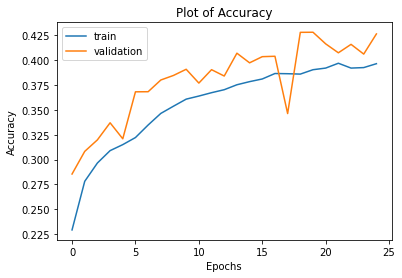

In [ ]:
# Plot the training accuracy for model 3
plt.plot(h3.history['accuracy'], label='train')
plt.plot(h3.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

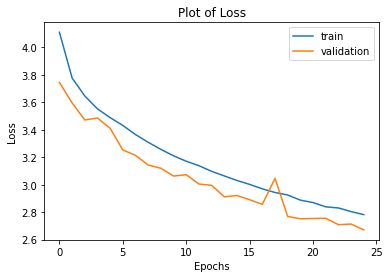

In [ ]:
# Plot the traininig loss for model 3
plt.plot(h3.history['loss'], label='train')
plt.plot(h3.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [ ]:
testLoss_model3, testAccuracy_model3 = dnnModel_aug.evaluate(x_test_orig, y_test_orig)
print('Testing loss for model 2\t', testLoss_model3)
print('Testing accuracy for model 2\t', testAccuracy_model3)

313/313 [==============================] - 1s 4ms/step - loss: 2.6707 - accuracy: 0.4265
Testing loss for model 2	 2.670720100402832
Testing accuracy for model 2	 0.42649999260902405


In [ ]:
# Print Confusion Matrix
predictions = dnnModel_aug.predict(x_test_orig)
y_pred = (predictions > 0.5)
print('Confusion Matrix')
matrix = confusion_matrix(y_test_orig.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print Classification Report
print('Classification Report')
print(classification_report(y_test_orig, y_pred, target_names=target_names))

Confusion Matrix


array([[881,   8,   2,   1,   2,   0,   6,   3,  91,   6],
       [765, 174,   1,   0,   0,   3,  13,   4,  10,  30],
       [860,   7,  52,   0,  34,   2,  20,  12,  12,   1],
       [942,   1,   2,   3,   7,  15,  17,   1,  11,   1],
       [764,   0,  22,   0, 180,   1,   8,  16,   9,   0],
       [861,   3,   5,   1,  15,  72,  14,   7,  21,   1],
       [734,   1,   8,   0,  35,   1, 213,   3,   3,   2],
       [774,   0,   2,   0,  23,   8,   3, 182,   6,   2],
       [584,   5,   0,   0,   2,   2,   3,   2, 393,   9],
       [821,  48,   1,   0,   0,   1,  10,  19,  19,  81]])

Classification Report
              precision    recall  f1-score   support

    airplane       0.70      0.27      0.39      1000
  automobile       0.70      0.17      0.28      1000
        bird       0.55      0.05      0.09      1000
         cat       0.60      0.00      0.01      1000
        deer       0.60      0.18      0.28      1000
         dog       0.69      0.07      0.13      1000
        frog       0.69      0.21      0.33      1000
       horse       0.73      0.18      0.29      1000
        ship       0.68      0.39      0.50      1000
       truck       0.61      0.08      0.14      1000

   micro avg       0.68      0.16      0.26     10000
   macro avg       0.66      0.16      0.24     10000
weighted avg       0.66      0.16      0.24     10000
 samples avg       0.16      0.16      0.16     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

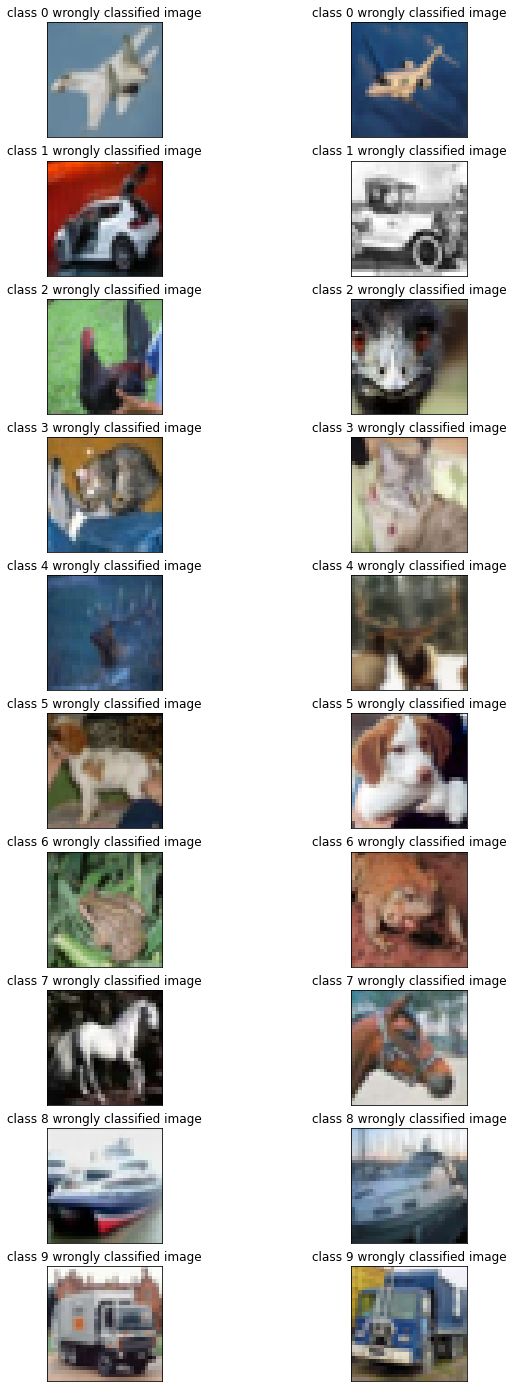

In [ ]:
missclassify_display(y_test_orig, y_pred)

We observe that with Data Augmentation, we have 70% precision on average which is more compared to other models.

This is because the dataset is augmented and hence, the model is more generalized. More augmented data implies less overfitting. This is also seen from the accuracy and loss graphs for training and validation graphs

##Model Creation with Data Augmentation (Image Height Shift)

In [ ]:
# define Data preparation
datagen_height = ImageDataGenerator(height_shift_range=2.5)

# test data set
# Fit and find the generation parameters over x_train. NOTE: Since, we have changed the type of x_train (to float32), we need to re-fit onto x_train
datagen_height.fit(x_train_orig)

# Generate the iterator
data_flow_height = datagen_height.flow(x_train_orig, y_train_orig, batch_size=Batch_Size)

# Creating a sequential model
dnnModel_aug1 = models.Sequential()

# HyperParameterList
InputLayer_nodes = 512
HiddenLayer1_nodes = 256
HiddenLayer2_nodes = 128
HiddenLayer3_nodes = 64
OutputLayer_nodes = 10                      #This will not change because the output is a one hot vector of 10 elements
Regularization_constant_lambda = 0.001

# Adding the layers to the sequential DNN Model

# Layer 1 = Input Layer
# We are applying regularization to layer's kernel (Dense) and layer's output only. Not applying to bias
# For Augmented data, flatten the input layers to 32*32*3
dnnModel_aug1.add(layers.Flatten(input_shape=(x_train_orig.shape[1], x_train_orig.shape[2], x_train_orig.shape[3])))
dnnModel_aug1.add(layers.Dense(InputLayer_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug1.add(layers.BatchNormalization())

# Layer2 = Hidden Layer 1
dnnModel_aug1.add(layers.Dense(HiddenLayer1_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug1.add(layers.BatchNormalization())

"""Dropouts act like bagging algorithms wehre we drop few features/ data instances and traing different models based on the dropped instances.
We select this layer as it has the maximum number of nodes. Dropping upto 50% should not affect the overall DNN Model severely"""
dnnModel_aug1.add(layers.Dropout(0.5))

# Layer3 = Hidden Layer 2
dnnModel_aug1.add(layers.Dense(HiddenLayer2_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug1.add(layers.BatchNormalization())

# Layer4 = Hidden Layer 3
dnnModel_aug1.add(layers.Dense(HiddenLayer3_nodes, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))
dnnModel_aug1.add(layers.BatchNormalization())

# Layer5 = Output Layer
dnnModel_aug1.add(layers.Dense(10, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda), activity_regularizer=tf.keras.regularizers.l2(Regularization_constant_lambda)))

dnnModel_aug1.summary()

decay = Learning_Rate/num_epoch
opt = tf.keras.optimizers.SGD(lr=Learning_Rate, momentum=0.9, decay=decay, nesterov=False)
dnnModel_aug1.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

h4 = dnnModel_aug1.fit(data_flow_height, steps_per_epoch = x_train_orig.shape[0]//Batch_Size, epochs = 25, validation_data=(x_test_orig, y_test_orig), callbacks=[timingCB])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 3072)              0         
                                                                 
 dense_34 (Dense)            (None, 512)               1573376   
                                                                 
 batch_normalization_27 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_35 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_28 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 256)              

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


390/390 [==============================] - 81s 53ms/step - loss: 4.0309 - accuracy: 0.2610 - val_loss: 3.6675 - val_accuracy: 0.2787
Epoch 2/25
390/390 [==============================] - 21s 54ms/step - loss: 3.6759 - accuracy: 0.3224 - val_loss: 3.5188 - val_accuracy: 0.3433
Epoch 3/25
390/390 [==============================] - 20s 52ms/step - loss: 3.5352 - accuracy: 0.3414 - val_loss: 3.4177 - val_accuracy: 0.3527
Epoch 4/25
390/390 [==============================] - 20s 51ms/step - loss: 3.4435 - accuracy: 0.3596 - val_loss: 3.2648 - val_accuracy: 0.3904
Epoch 5/25
390/390 [==============================] - 20s 51ms/step - loss: 3.3763 - accuracy: 0.3646 - val_loss: 3.2436 - val_accuracy: 0.3971
Epoch 6/25
390/390 [==============================] - 20s 52ms/step - loss: 3.3094 - accuracy: 0.3750 - val_loss: 3.1661 - val_accuracy: 0.3993
Epoch 7/25
390/390 [==============================] - 20s 52ms/step - loss: 3.2459 - accuracy: 0.3877 - val_loss: 3.1267 - val_accuracy: 0.4001
Epo

In [ ]:
print('Final training loss for model 4 \t', h4.history['loss'][-1])
print('Final training accuracy for model 4 \t', h4.history['accuracy'][-1])
print("Total training time for model 4 = " + str(timingCB.totaltime))

Final training loss for model 4 	 2.601959228515625
Final training accuracy for model 4 	 0.467657208442688
Total training time for model 4 = 632.954172059


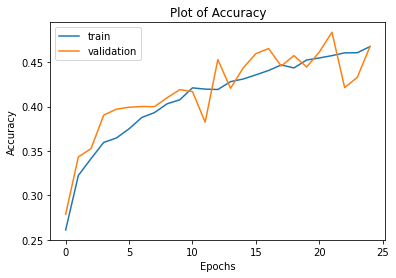

In [ ]:
# Plot the training accuracy for model 4
plt.plot(h4.history['accuracy'], label='train')
plt.plot(h4.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy')
plt.legend()
plt.show()

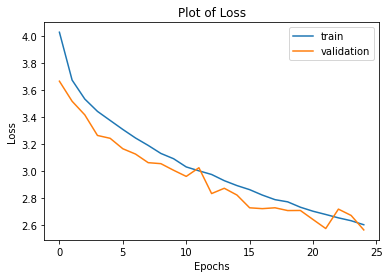

In [ ]:
# Plot the traininig loss for model 4
plt.plot(h4.history['loss'], label='train')
plt.plot(h4.history['val_loss'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Plot of Loss')
plt.legend()
plt.show()

In [ ]:
testLoss_model4, testAccuracy_model4 = dnnModel_aug1.evaluate(x_test_orig, y_test_orig)
print('Testing loss for model 2\t', testLoss_model4)
print('Testing accuracy for model 2\t', testAccuracy_model4)

313/313 [==============================] - 1s 4ms/step - loss: 2.5636 - accuracy: 0.4678
Testing loss for model 2	 2.563591718673706
Testing accuracy for model 2	 0.46779999136924744


In [ ]:
predictions = dnnModel_aug1.predict(x_test_orig)
y_pred = (predictions > 0.5)
print('Confusion Matrix')
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
display(matrix)
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#Print Classification Report
print('Classification Report')
print(classification_report(y_test_orig, y_pred, target_names=target_names))

Confusion Matrix


array([[825,   3,   5,   1,   0,   2,   6,  11, 140,   7],
       [608, 257,   0,   1,   1,   1,   3,   9,  61,  59],
       [828,   3,  59,   5,  11,  10,  35,  37,   9,   3],
       [878,   1,   2,  39,   4,  27,  21,  11,  13,   4],
       [764,   0,  11,   2, 105,   1,  33,  67,  15,   2],
       [829,   0,   3,  15,   3, 107,  10,  22,   7,   4],
       [696,   0,   6,   8,  12,   0, 253,  15,   6,   4],
       [552,   0,   2,   3,   9,  13,   5, 398,   8,  10],
       [398,  11,   0,   0,   1,   1,   1,   0, 565,  23],
       [562,  43,   0,   2,   0,   3,   5,  21,  71, 293]])

Classification Report
              precision    recall  f1-score   support

    airplane       0.73      0.34      0.46      1000
  automobile       0.81      0.26      0.39      1000
        bird       0.67      0.06      0.11      1000
         cat       0.51      0.04      0.07      1000
        deer       0.72      0.10      0.18      1000
         dog       0.65      0.11      0.18      1000
        frog       0.68      0.25      0.37      1000
       horse       0.67      0.40      0.50      1000
        ship       0.63      0.56      0.60      1000
       truck       0.72      0.29      0.42      1000

   micro avg       0.69      0.24      0.36     10000
   macro avg       0.68      0.24      0.33     10000
weighted avg       0.68      0.24      0.33     10000
 samples avg       0.24      0.24      0.24     10000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

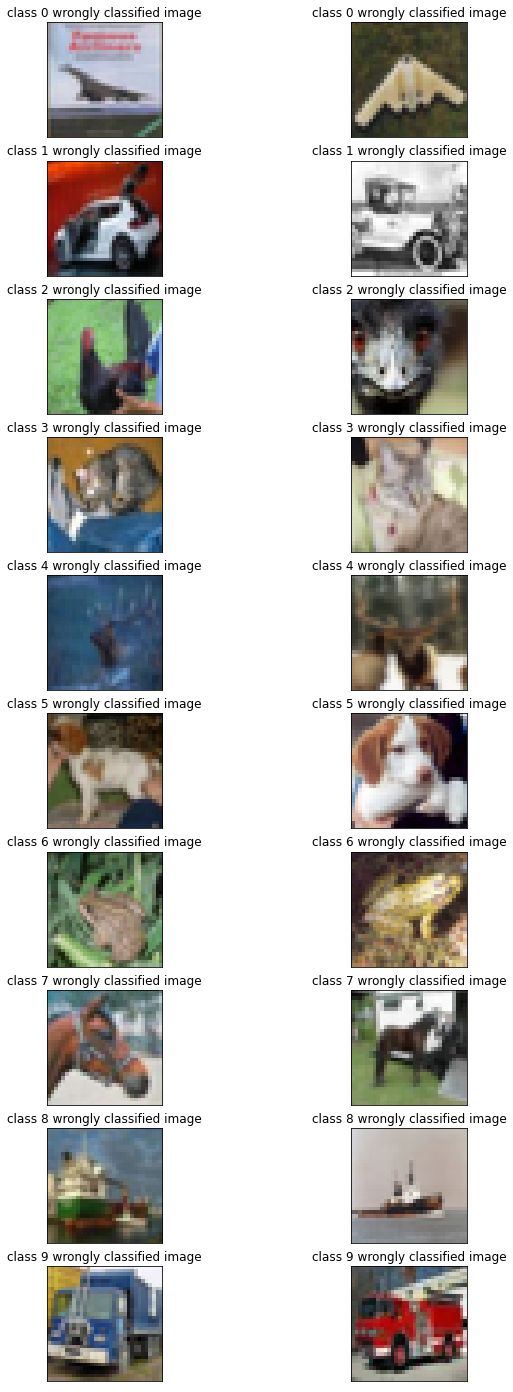

In [ ]:
missclassify_display(y_test_orig, y_pred)

Similar to data augmentation with rotation, we see that here the precision values are strong. Data Augmentation ensures that the model will not see the same image again during different epochs. This ensures that overfitting does not occur. The accuracy graphs of train and validation show that there is no overfitting (Both values are at par)